In [2]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import TargetEncoder
from sklearn import metrics

In [3]:
data_df = pd.read_csv('diabetes_prediction_dataset.csv')
target = data_df['diabetes']
data_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


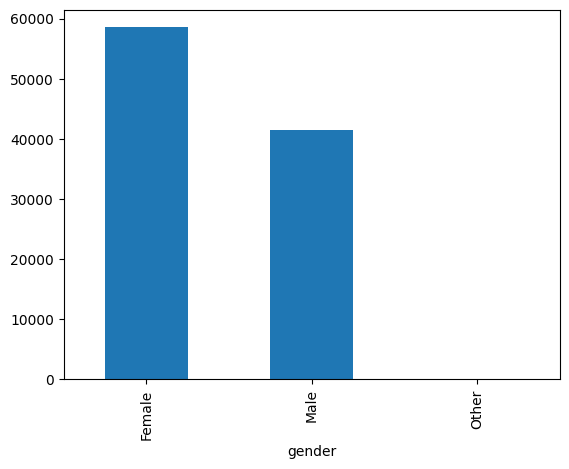

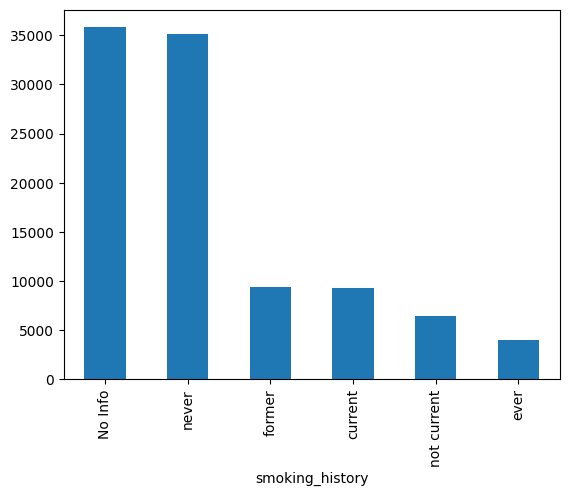

In [4]:
cat_feature = ['gender', 'smoking_history']
for feature in cat_feature:
    plot = data_df[feature].value_counts(dropna=False).plot(kind='bar')
    plt.show()

In [5]:
import category_encoders as ce 
for feature in cat_feature:
    data_df[feature] = ce.TargetEncoder().fit_transform(data_df[feature], target)
data_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.076189,80.0,0,1,0.095341,25.19,6.6,140,0
1,0.076189,54.0,0,0,0.040596,27.32,6.6,80,0
2,0.097490,28.0,0,0,0.095341,27.32,5.7,158,0
3,0.076189,36.0,0,0,0.102089,23.45,5.0,155,0
4,0.097490,76.0,1,1,0.102089,20.14,4.8,155,0


### 8.5% людей болеют диабетом

In [6]:
print(data_df['diabetes'].sum() / len(data_df) * 100)
data_df = data_df.drop(columns='diabetes')
data_df.head()

8.5


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0.076189,80.0,0,1,0.095341,25.19,6.6,140
1,0.076189,54.0,0,0,0.040596,27.32,6.6,80
2,0.097490,28.0,0,0,0.095341,27.32,5.7,158
3,0.076189,36.0,0,0,0.102089,23.45,5.0,155
4,0.097490,76.0,1,1,0.102089,20.14,4.8,155


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_df, target, test_size=0.2, random_state=321)
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
predict = GBC.predict(X_test)
prdict_proba = GBC.predict_proba(X_test)
print(metrics.accuracy_score(y_test, predict))


0.97105


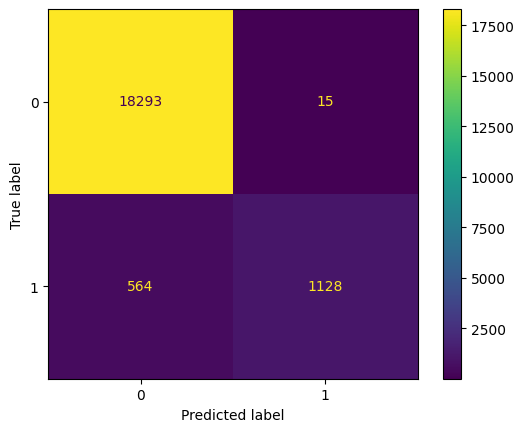

In [8]:
confusion_matrix = metrics.confusion_matrix(y_test, predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=GBC.classes_)
disp.plot()
plt.show()

Thus in binary classification,  
the count of  
**true negatives** is $C_{0,0}$ = **TN**  
**false negatives** is $C_{1,0}$ = **FN**    
**true positives** is $C_{1,1}$ = **TP**   
**false positives** is $C_{0,1}$ = **FP**  

In [9]:
TP = confusion_matrix[1][1]
TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
my_precision = TP / (TP + FP)
my_recall = TP / (TP + FN)
my_specificity = TN / (TN + FP)
f1 = 2 * (my_precision * my_recall) / (my_precision + my_recall)
print(f'Precision = {my_precision}')
print(f'Recall = {my_recall}')
print(f'Specificity = {my_specificity}')
print(f"F1 = {f1}")

Precision = 0.9868766404199475
Recall = 0.6666666666666666
Specificity = 0.9991806860388901
F1 = 0.7957671957671958


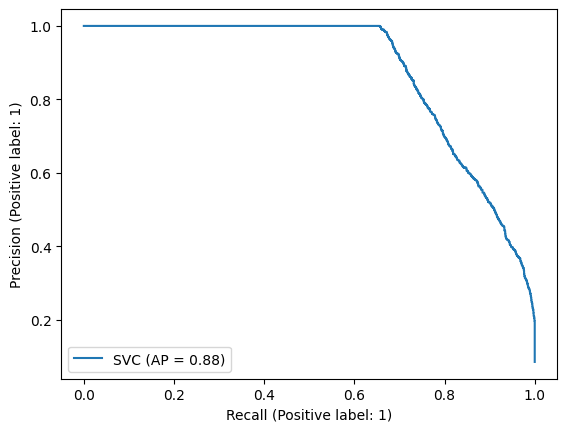

In [10]:
disp = metrics.PrecisionRecallDisplay.from_estimator(GBC, X_test, y_test, name='SVC' )

0.9779434580395037


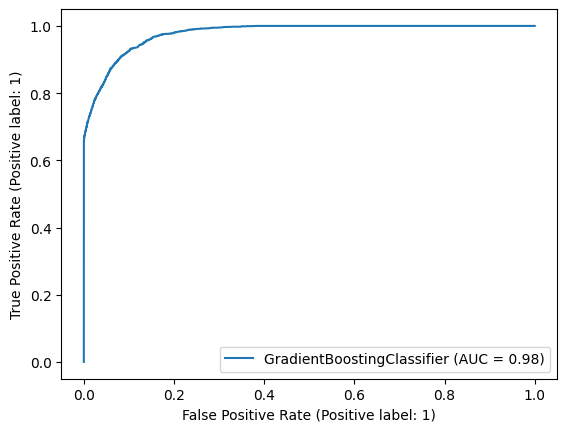

In [11]:
disp = metrics.RocCurveDisplay.from_estimator(GBC, X_test, y_test)
print(metrics.roc_auc_score(y_test, prdict_proba[:,1]))


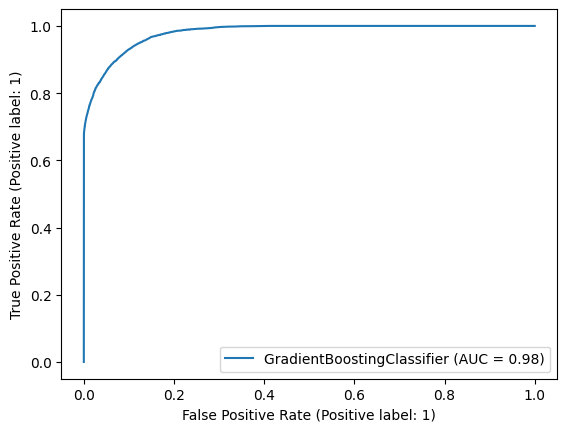

In [12]:
disp = metrics.RocCurveDisplay.from_estimator(GBC, X_train, y_train)

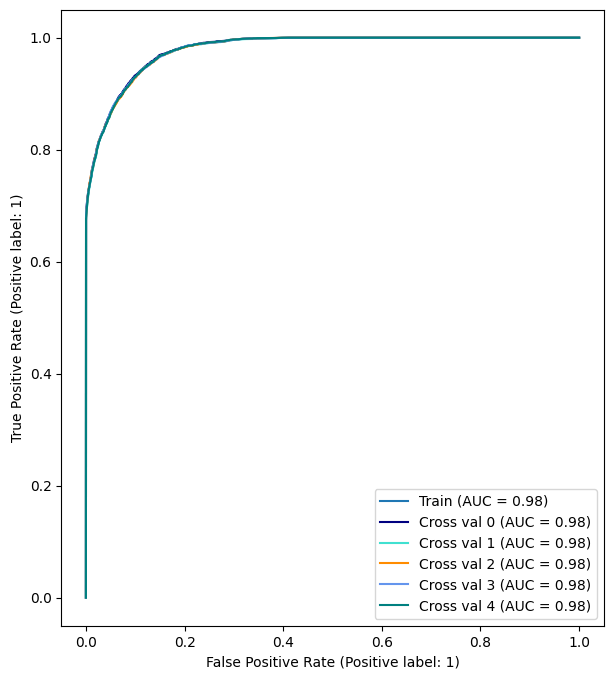

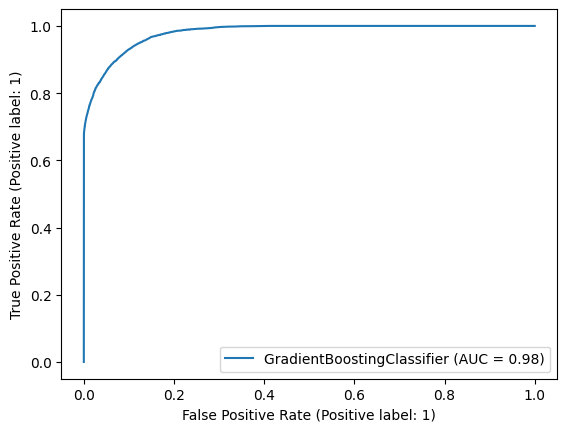

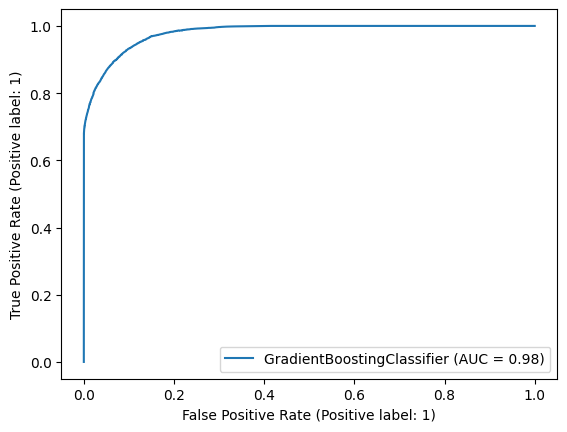

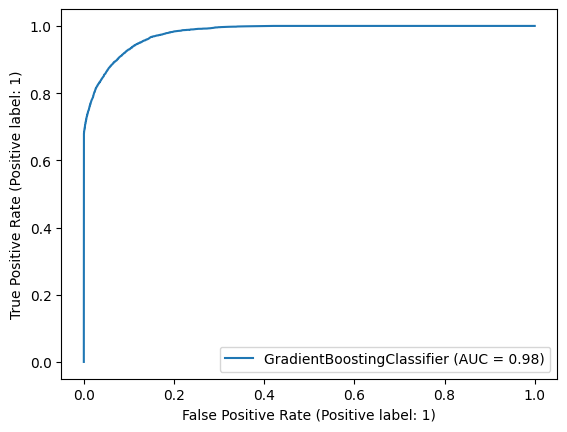

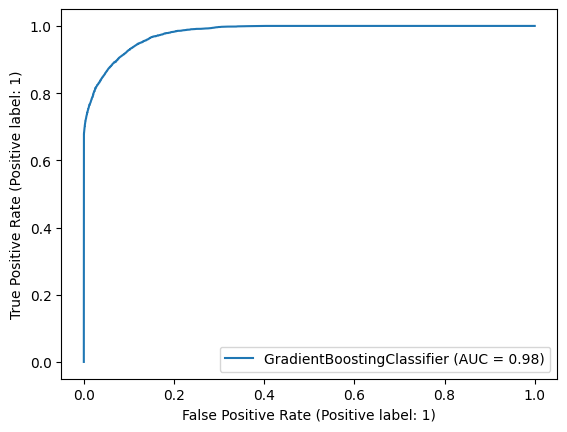

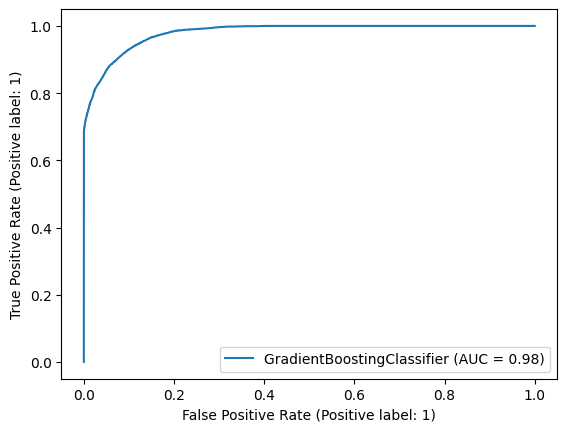

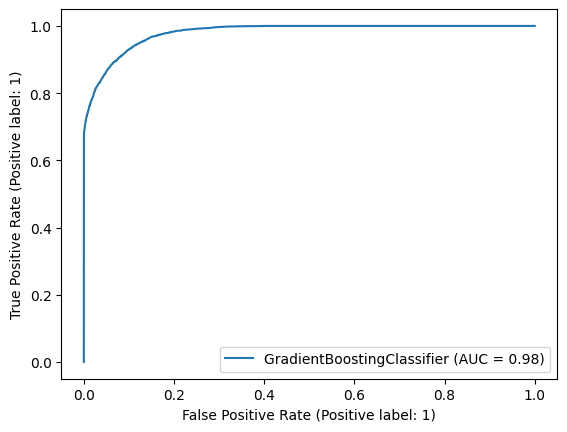

In [13]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
colors = ["navy", "turquoise", "darkorange", "cornflowerblue", "teal", 'salmon' ]
_, ax = plt.subplots(figsize=(7, 8))
disp = metrics.RocCurveDisplay.from_estimator(GBC, X_train, y_train)
disp.plot(ax=ax,  name=f'Train')
for id , (train_index, test_index) in enumerate(kf.split(X_train)):
    X_train_val, X_test_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_val, y_test_val = y_train.iloc[train_index], y_train.iloc[test_index]
    disp = metrics.RocCurveDisplay.from_estimator(GBC, X_train_val, y_train_val).plot(ax=ax,  name=f'Cross val {id}', color=colors[id])


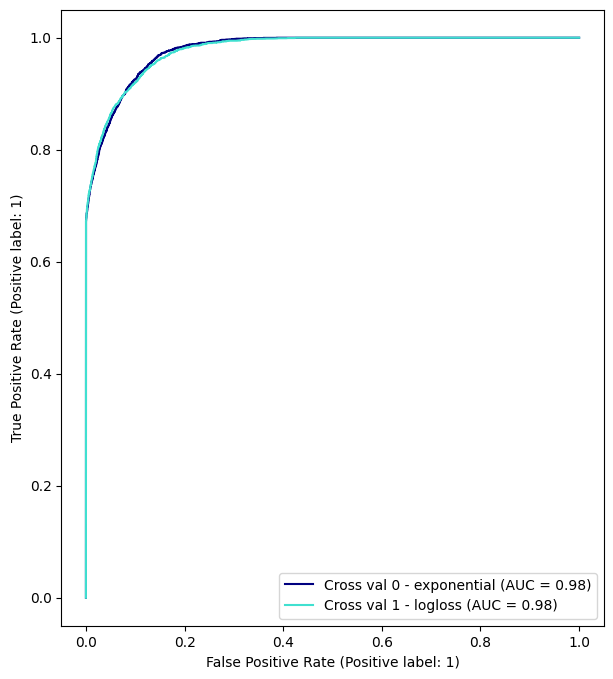

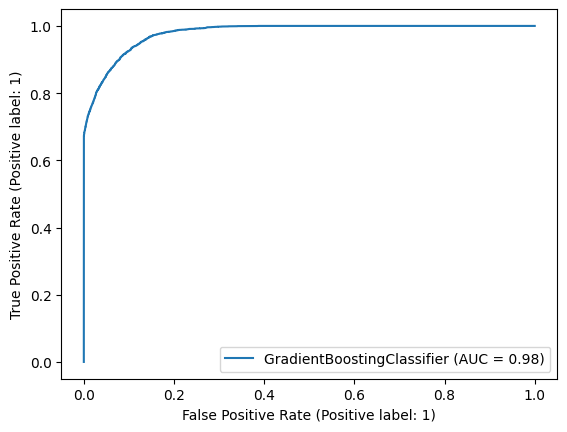

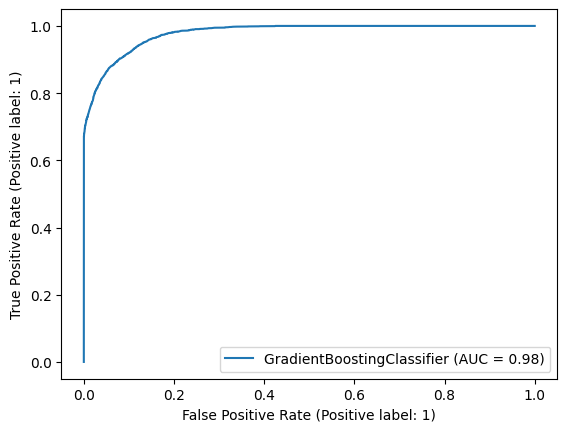

In [14]:
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(data_df, target, test_size=0.2, random_state=852)

GBC_exp = GradientBoostingClassifier(loss='exponential')
GBC_logloss = GradientBoostingClassifier(loss='log_loss')
kf = KFold(n_splits=2)
colors = ["navy", "turquoise", "darkorange", "cornflowerblue", "teal", 'salmon' ]
_, ax = plt.subplots(figsize=(7, 8))
for id , (train_index, test_index) in enumerate(kf.split(X_train)):
    X_train_val, X_test_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_val, y_test_val = y_train.iloc[train_index], y_train.iloc[test_index]
    match id:
        case 0:
            GBC_exp.fit(X_train_val, y_train_val)
            disp = metrics.RocCurveDisplay.from_estimator(GBC_exp, X_test_val, y_test_val).plot(ax=ax,  name=f'Cross val {id} - exponential', color=colors[id])
        case 1:
            GBC_logloss.fit(X_train_val, y_train_val)
            disp = metrics.RocCurveDisplay.from_estimator(GBC_logloss, X_test_val, y_test_val).plot(ax=ax,  name=f'Cross val {id} - logloss', color=colors[id])

    
    
